In [100]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
import scipy.stats
import statistics
import scipy.stats as stats
from scipy.stats import boxcox
from scipy.stats import jarque_bera
from scipy.stats import normaltest

warnings.filterwarnings('ignore')

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

exam_df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [5]:
exam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [30]:
# Percent of null enteries in each column
len(exam_df) - exam_df.count()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
exam_df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


# 1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

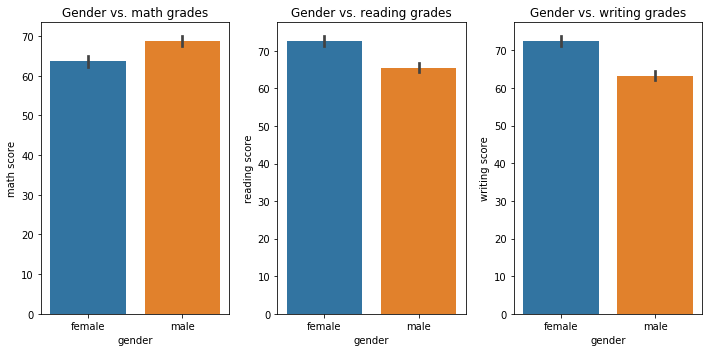

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups female and male:
t = -5.383245869828983, p = 9.120185549328822e-08
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups female and male:
t = 7.959308005187657, p = 4.680538743933289e-15
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups female and male:
t = 9.979557910004507, p = 2.019877706867934e-22


In [75]:
# Gender vs. exam performance
plt.figure(figsize = (10,5))

plt.subplot(1,3,1)
sns.barplot( exam_df['gender'], exam_df['math score'])
plt.title('Gender vs. math grades')

plt.subplot(1,3,2)
sns.barplot( exam_df['gender'], exam_df['reading score'])
plt.title('Gender vs. reading grades')

plt.subplot(1,3,3)
sns.barplot( exam_df['gender'], exam_df['writing score'])
plt.title('Gender vs. writing grades')

plt.tight_layout()
plt.show()

# t-test gender's effect on exam performance
genders = exam_df['gender'].unique()
for var in ['math score', 'reading score', 'writing score']:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(genders)):
        for j in range(i+1, len(genders)):
            print("t-test between groups {0} and {1}:".format(genders[i], genders[j]))
            print('t = {0}, p = {1}'.format(*stats.ttest_ind(
                exam_df[exam_df['gender']==genders[i]][var], 
                exam_df[exam_df['gender']==genders[j]][var]
            )))

females are significantly better in reading and writing while males seem to be better at math

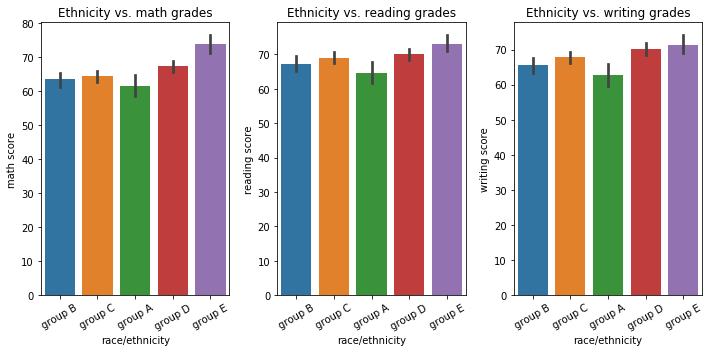

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups group B and group C:
t = -0.7315669893534263, p = 0.4647708939167453
t-test between groups group B and group A:
t = 0.9355076279747488, p = 0.3503415961659957
t-test between groups group B and group D:
t = -2.82845539712675, p = 0.004886197137104194
t-test between groups group B and group E:
t = -6.007397050552227, p = 5.007946047497971e-09
t-test between groups group C and group A:
t = 1.5997220303217299, p = 0.11043810745588042
t-test between groups group C and group D:
t = -2.41858624746011, p = 0.015888349556016285
t-test between groups group C and group E:
t = -6.127642520822135, p = 1.927238849552764e-09
t-test between groups group A and group D:
t = -3.3466982429712298, p = 0.0009068636053543751
t-test between groups group A and group E:
t = -5.936141025544798, p = 1.083559122656415e-08
t-test between groups group D and grou

In [76]:
# Ethnicity vs. exam performance
plt.figure(figsize = (10,5))

plt.subplot(1,3,1)
g = sns.barplot( exam_df['race/ethnicity'], exam_df['math score'])
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.title('Ethnicity vs. math grades')

plt.subplot(1,3,2)
g = sns.barplot( exam_df['race/ethnicity'], exam_df['reading score'])
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.title('Ethnicity vs. reading grades')

plt.subplot(1,3,3)
g = sns.barplot( exam_df['race/ethnicity'], exam_df['writing score'])
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.title('Ethnicity vs. writing grades')

plt.tight_layout()
plt.show()

# t-test ethnicity/race influence on exam performance
ethnicities = exam_df['race/ethnicity'].unique()
for var in ['math score', 'reading score', 'writing score']:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(ethnicities)):
        for j in range(i+1, len(ethnicities)):
            print("t-test between groups {0} and {1}:".format(ethnicities[i], ethnicities[j]))
            print('t = {0}, p = {1}'.format(*stats.ttest_ind(
                exam_df[exam_df['race/ethnicity']==ethnicities[i]][var], 
                exam_df[exam_df['race/ethnicity']==ethnicities[j]][var]
            )))

Ethnic groups D and E seem to be significantly different from groups A,B and C in all subjects.

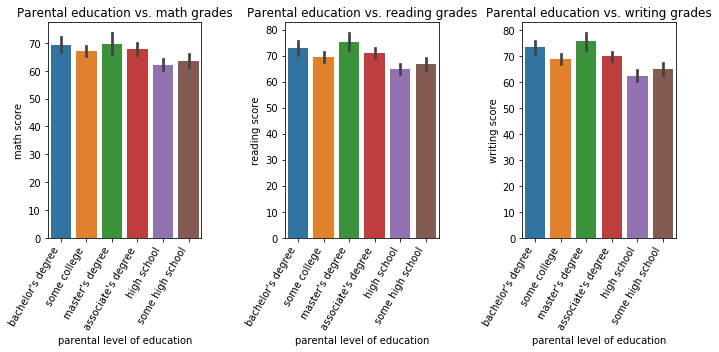

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups bachelor's degree and some college:
t = 1.3702352829617477, p = 0.17151224218471559
t-test between groups bachelor's degree and master's degree:
t = -0.14868196568849312, p = 0.8819757824867702
t-test between groups bachelor's degree and associate's degree:
t = 0.8786641889793243, p = 0.38020757818036177
t-test between groups bachelor's degree and high school:
t = 4.236143622484822, p = 2.9965345853843376e-05
t-test between groups bachelor's degree and some high school:
t = 3.196718602676573, p = 0.0015409192922812146
t-test between groups some college and master's degree:
t = -1.2356334215824571, p = 0.21761956810347416
t-test between groups some college and associate's degree:
t = -0.5426842696247527, p = 0.5876182809234072
t-test between groups some college and high school:
t = 3.5461079495681163, p = 0.00043498004192453146
t-te

In [80]:
# Parent education vs. exam performance
plt.figure(figsize = (10,5))

plt.subplot(1,3,1)
g = sns.barplot( exam_df['parental level of education'], exam_df['math score'])
g.set_xticklabels(g.get_xticklabels(), rotation=60, ha='right')
plt.title('Parental education vs. math grades')

plt.subplot(1,3,2)
g = sns.barplot( exam_df['parental level of education'], exam_df['reading score'])
g.set_xticklabels(g.get_xticklabels(), rotation=60, ha='right')
plt.title('Parental education vs. reading grades')

plt.subplot(1,3,3)
g = sns.barplot( exam_df['parental level of education'], exam_df['writing score'])
g.set_xticklabels(g.get_xticklabels(), rotation=60, ha='right')
plt.title('Parental education vs. writing grades')

plt.tight_layout()
plt.show()

# t-test parental education level influence on exam performance
parent = exam_df['parental level of education'].unique()
for var in ['math score', 'reading score', 'writing score']:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(parent)):
        for j in range(i+1, len(parent)):
            print("t-test between groups {0} and {1}:".format(parent[i], parent[j]))
            print('t = {0}, p = {1}'.format(*stats.ttest_ind(
                exam_df[exam_df['parental level of education']==parent[i]][var], 
                exam_df[exam_df['parental level of education']==parent[j]][var]
            )))

There is significant differences in all subjects amongst student, whom parents' level of education gap is big such as, high school and masters degree

# 2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

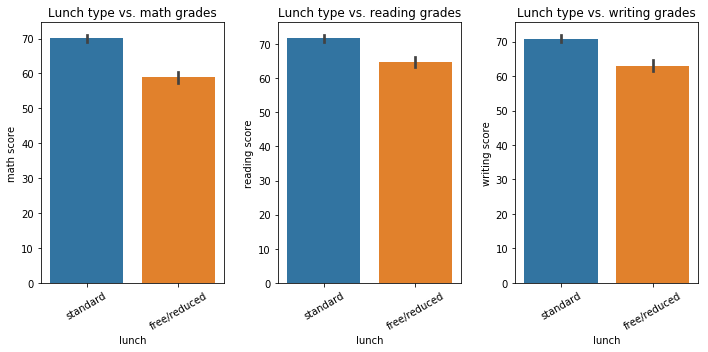

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups standard and free/reduced:
t = 11.837180472914612, p = 2.4131955993137074e-30
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups standard and free/reduced:
t = 7.451056467473455, p = 2.0027966545279011e-13
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups standard and free/reduced:
t = 8.009784197834758, p = 3.186189583166477e-15


In [78]:
# Barplot lunch type vs. exam performance
plt.figure(figsize = (10,5))

plt.subplot(1,3,1)
g = sns.barplot( exam_df['lunch'], exam_df['math score'])
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.title('Lunch type vs. math grades')

plt.subplot(1,3,2)
g = sns.barplot( exam_df['lunch'], exam_df['reading score'])
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.title('Lunch type vs. reading grades')

plt.subplot(1,3,3)
g = sns.barplot( exam_df['lunch'], exam_df['writing score'])
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.title('Lunch type vs. writing grades')

plt.tight_layout()
plt.show()

# t-test lunch exam performance differences
lunches = exam_df['lunch'].unique()
for var in ['math score', 'reading score', 'writing score']:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(lunches)):
        for j in range(i+1, len(lunches)):
            print("t-test between groups {0} and {1}:".format(lunches[i], lunches[j]))
            print('t = {0}, p = {1}'.format(*stats.ttest_ind(
                exam_df[exam_df['lunch']==lunches[i]][var], 
                exam_df[exam_df['lunch']==lunches[j]][var]
            )))

Children of families that are eligible for free/reduced lunch seem to be at a disadvantage in all subjects.

# 3. Does the test preparation course seem to have an effect on the exam performances?

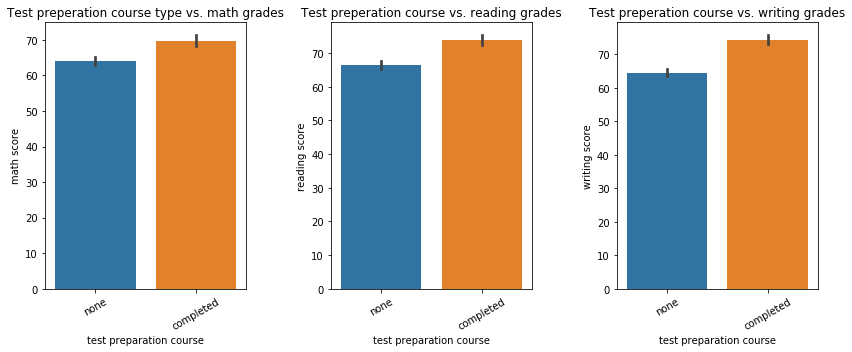

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups none and completed:
t = -5.704616417349102, p = 1.5359134607147415e-08
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups none and completed:
t = -7.871663538941468, p = 9.081783336892205e-15
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups none and completed:
t = -10.409173436808748, p = 3.68529173524572e-24


In [83]:
# Barplot test preperation type vs. exam performance
plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
g = sns.barplot( exam_df['test preparation course'], exam_df['math score'])
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.title('Test preperation course type vs. math grades')

plt.subplot(1,3,2)
g = sns.barplot( exam_df['test preparation course'], exam_df['reading score'])
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.title('Test preperation course vs. reading grades')

plt.subplot(1,3,3)
g = sns.barplot( exam_df['test preparation course'], exam_df['writing score'])
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.title('Test preperation course vs. writing grades')

plt.tight_layout()
plt.show()

# t-test test preperation course effect on exam performance
prep_course = exam_df['test preparation course'].unique()
for var in ['math score', 'reading score', 'writing score']:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(prep_course)):
        for j in range(i+1, len(prep_course)):
            print("t-test between groups {0} and {1}:".format(prep_course[i], prep_course[j]))
            print('t = {0}, p = {1}'.format(*stats.ttest_ind(
                exam_df[exam_df['test preparation course']==prep_course[i]][var], 
                exam_df[exam_df['test preparation course']==prep_course[j]][var]
            )))

The preperation course seems to significantly increase exam performance

# 4. Which 2 exam scores are most correlated with each other?

In [84]:
exam_df[['math score', 'reading score', 'writing score']].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


Reading and writing are most correlated exam scores

***
# 1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

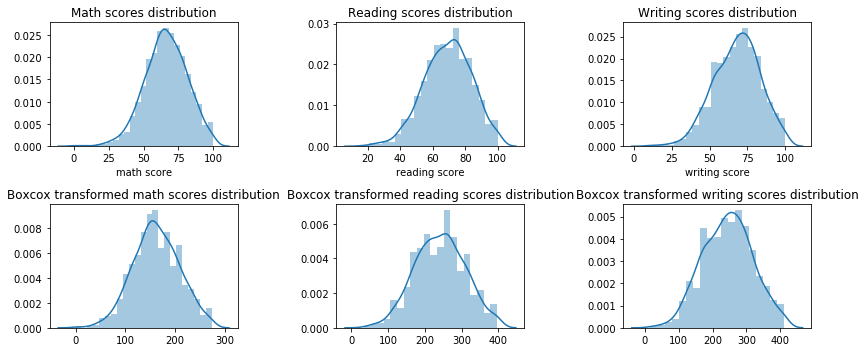

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
Jarque-Bera test statistics on original data is 15.9 and p value is 0.000351
Normality test statistics on original data is 15.4 and p value is 0.000451
Jarque-Bera test statistics on transformed data is 0.981 and p value is 0.612
Normality test statistics on transformed data is 0.901 and p value is 0.637
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
Jarque-Bera test statistics on original data is 11.4 and p value is 0.00337
Normality test statistics on original data is 11.1 and p value is 0.00385
Jarque-Bera test statistics on transformed data is 4.12 and p value is 0.127
Normality test statistics on transformed data is 5.28 and p value is 0.0713
------------------------------------------------
Comparisons for variable: writing score
-----------------------------

In [117]:
# Histograms of exam results
plt.figure(figsize = (12,5))

plt.subplot(2,3,1)
g = sns.distplot( exam_df['math score'])
plt.title('Math scores distribution')

plt.subplot(2,3,2)
g = sns.distplot( exam_df['reading score'])
plt.title('Reading scores distribution')

plt.subplot(2,3,3)
g = sns.distplot( exam_df['writing score'])
plt.title('Writing scores distribution')

plt.subplot(2,3,4)
data = exam_df['math score'].values
posdata = data[data > 0]
math_score_boxcox, lam = boxcox(posdata)
if lam > 0:
    x = np.empty_like(data)
    x[data > 0] = math_score_boxcox
    x[data == 0] = -1/lam
    g = sns.distplot( x)
    plt.title('Boxcox transformed math scores distribution')

plt.subplot(2,3,5)
reading_score_boxcox,_ = boxcox(exam_df['reading score'])
g = sns.distplot( reading_score_boxcox)
plt.title('Boxcox transformed reading scores distribution')

plt.subplot(2,3,6)
writing_score_boxcox,_ = boxcox(exam_df['writing score'])
g = sns.distplot( writing_score_boxcox)
plt.title('Boxcox transformed writing scores distribution')

plt.tight_layout()
plt.show()

# Normality test exam score distributions
for var in ['math score', 'reading score', 'writing score']:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    try:
        boxcox_var,_ = boxcox(exam_df[var])
    except:
        data = exam_df[var].values
        posdata = data[data > 0]
        boxcox_var, lam = boxcox(posdata)
        if lam > 0:
            boxcox_var = np.empty_like(data)
            boxcox_var[data > 0] = math_score_boxcox
            boxcox_var[data == 0] = -1/lam
        else:
            print('Boxcox transofrmation cannot be applied to this dataset')
            continue
    jb_stats = jarque_bera(exam_df[var])
    norm_stats = normaltest(exam_df[var])
    print("Jarque-Bera test statistics on original data is {0:.3} and p value is {1:.3}".format(*jb_stats))
    print("Normality test statistics on original data is {0:.3} and p value is {1:.3}".format(*norm_stats))
    
    boxcox_jb_stats = jarque_bera(boxcox_var)
    boxcox_norm_stats = normaltest(boxcox_var)
    print("Jarque-Bera test statistics on transformed data is {0:.3} and p value is {1:.3}".format(*boxcox_jb_stats))
    print("Normality test statistics on transformed data is {0:.3} and p value is {1:.3}".format(*boxcox_norm_stats))

Boxcox transformation made the score distributions closer to normality

# 2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

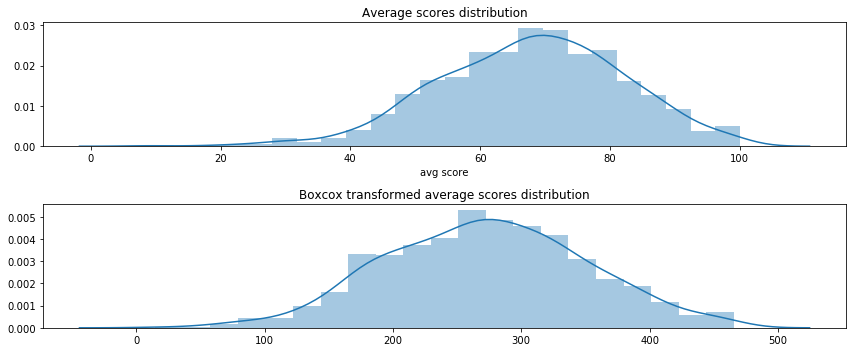

------------------------------------------------
Comparisons for variable: avg score
------------------------------------------------
Jarque-Bera test statistics on original data is 15.5 and p value is 0.000441
Normality test statistics on original data is 15.2 and p value is 0.000504
Jarque-Bera test statistics on transformed data is 2.44 and p value is 0.296
Normality test statistics on transformed data is 2.78 and p value is 0.249


In [133]:
# Scores average distribution
plt.figure(figsize = (12,5))

exam_df['avg score'] = exam_df[['math score', 'reading score', 'writing score']].mean(axis=1)

plt.subplot(2,1,1)
sns.distplot( exam_df['avg score'])
plt.title('Average scores distribution')

avg_score_boxcox,_ = boxcox(exam_df['avg score'])
plt.subplot(2,1,2)
sns.distplot(avg_score_boxcox)
plt.title('Boxcox transformed average scores distribution')

plt.tight_layout()
plt.show()

# Normality test exam score distributions
for var in ['avg score']:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    try:
        boxcox_var,_ = boxcox(exam_df[var])
    except:
        data = exam_df[var].values
        posdata = data[data > 0]
        boxcox_var, lam = boxcox(posdata)
        if lam > 0:
            boxcox_var = np.empty_like(data)
            boxcox_var[data > 0] = math_score_boxcox
            boxcox_var[data == 0] = -1/lam
        else:
            print('Boxcox transofrmation cannot be applied to this dataset')
            continue
    jb_stats = jarque_bera(exam_df[var])
    norm_stats = normaltest(exam_df[var])
    print("Jarque-Bera test statistics on original data is {0:.3} and p value is {1:.3}".format(*jb_stats))
    print("Normality test statistics on original data is {0:.3} and p value is {1:.3}".format(*norm_stats))
    
    boxcox_jb_stats = jarque_bera(boxcox_var)
    boxcox_norm_stats = normaltest(boxcox_var)
    print("Jarque-Bera test statistics on transformed data is {0:.3} and p value is {1:.3}".format(*boxcox_jb_stats))
    print("Normality test statistics on transformed data is {0:.3} and p value is {1:.3}".format(*boxcox_norm_stats))

Boxcox transformation made the score average more normal

# 3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

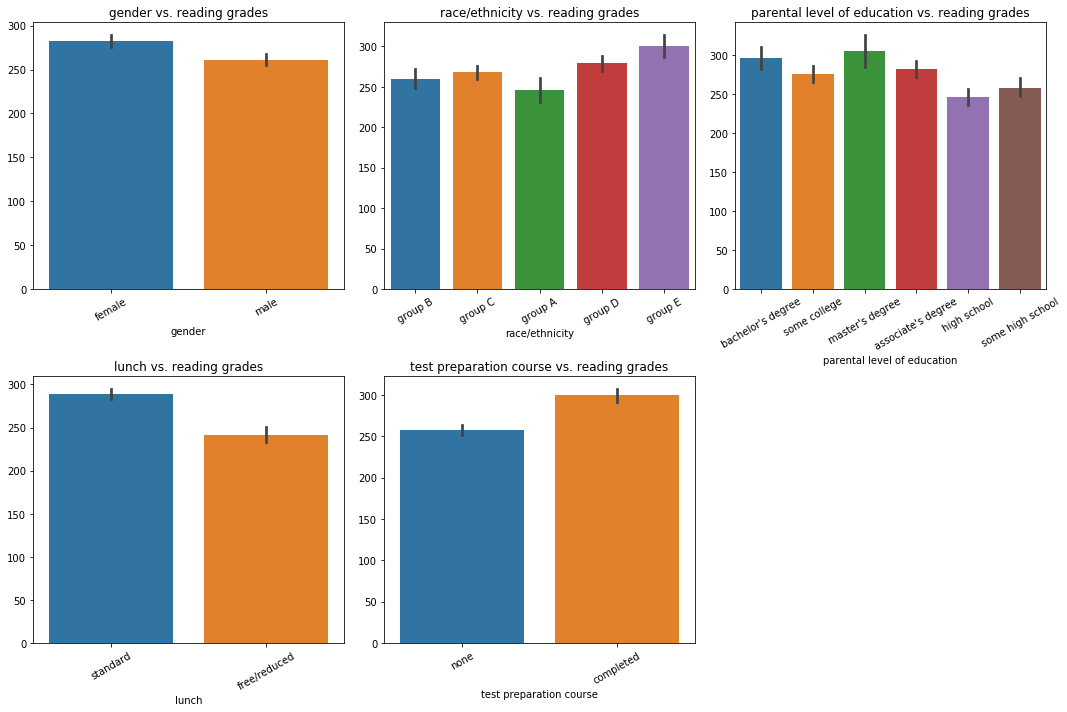

In [150]:
# Boxplot variables vs. average score
plt.figure(figsize = (15,10))

cols = exam_df.columns[:5]
for i in range(len(cols)):
    plt.subplot(2,3,i+1)
    g = sns.barplot(exam_df[exam_df.columns[i]], avg_score_boxcox)
    g.set_xticklabels(g.get_xticklabels(), rotation=30)
    plt.title('{} vs. reading grades'.format(exam_df.columns[i]))

plt.tight_layout()
plt.show()







- Gender and test preperation course seem to correlate with average exam score.
- Lunch also seems to correlate with average exam score. However, this is probably due to socioeconomical factors, which the lunch type is reflective of.
- Race/ ethnicicty and parental level of education show variability in average exam score